In [2]:
#japanize_matplotlibのインストール
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 28.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=28322b8c3cbe53039b436577819215970eb9c7dd35273e9daf263715bdcc21be
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


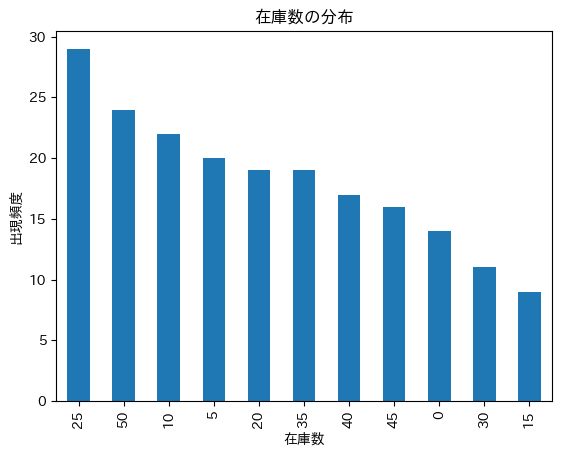

商品番号ごとの在庫数:
商品番号
1QJFO8QY    890
2HSTCDWM    535
48XMJXKO    270
8T7D5DQA    660
MESUDVWQ    395
QRMOGNUU    725
S6RE8W6X    430
X0ZE2ZMY    360
YY4HAAZR    425
Z4WOOIYV    465
Name: 在庫, dtype: int64

商品番号ごとの在庫基本統計量:
          count       mean        std  min    25%   50%    75%   max
商品番号                                                                
1QJFO8QY   32.0  27.812500  16.111381  0.0  13.75  27.5  40.00  50.0
2HSTCDWM   20.0  26.750000  15.067829  5.0  10.00  30.0  40.00  50.0
48XMJXKO   10.0  27.000000  18.737959  0.0  10.00  27.5  42.50  50.0
8T7D5DQA   21.0  31.428571  16.743869  0.0  20.00  35.0  45.00  50.0
MESUDVWQ   17.0  23.235294  15.904125  0.0  10.00  25.0  40.00  45.0
QRMOGNUU   27.0  26.851852  17.821128  0.0  10.00  20.0  45.00  50.0
S6RE8W6X   20.0  21.500000  12.680279  0.0  15.00  22.5  25.00  50.0
X0ZE2ZMY   14.0  25.714286  12.224997  0.0  21.25  25.0  30.00  45.0
YY4HAAZR   17.0  25.000000  17.677670  0.0  10.00  20.0  40.00  50.0
Z4WOOIYV   22.0  21.1363

In [18]:
# Step1必要なライブラリをインポートする。
# matplotlib.pyplot
import matplotlib.pyplot as plt
# pandas
import pandas as pd
# japanize_matplotlib
import japanize_matplotlib

# 7.4章と同様のデータを呼び出す
df = pd.read_csv("sample_pandas_6.csv") #マージ前のデータ"sample_pandas_6.csv"の呼び出し
category_df = pd.read_csv('category.csv') #"category.csv"の呼び出し
df = pd.merge(df, category_df[['商品番号', 'カテゴリー']], how='inner', on='商品番号') #データをマージ
df

# Step2カテゴリー列の要素(弁当・デザートなど)のユニークな出現頻度をカウントするメソッドと、そのメソッドの実行結果を棒グラフ化するメソッドを組み合わせたコードを記述する。

# '在庫'列のユニークな出現頻度をカウント
inventory_counts = df['在庫'].value_counts()  # 結果を変数に格納

# Seriesのplotメソッドを使用して棒グラフを作成
inventory_counts.plot(kind='bar', title='在庫数の分布')  # ここでplotメソッドを呼び出す
plt.xlabel('在庫数')  # x軸ラベル
plt.ylabel('出現頻度')  # y軸ラベル

# Srep3グラフを表示
plt.show()

# Step4ある基準列(商品番号列)ごとに要素をグループにまとめサブ列を集計するメソッドと、基本統計量を算出するメソッドを組み合わせたコードを記載する
# 商品番号ごとに在庫数を集計する（在庫数合計）
stock_sum = df.groupby('商品番号')['在庫'].sum()  # 商品番号ごとの在庫数合計を計算
print("商品番号ごとの在庫数:")
print(stock_sum)

# 商品番号ごとの在庫数の基本統計量を算出する
stock_stats = df.groupby('商品番号')['在庫'].describe()  # 基本統計量を算出
print("\n商品番号ごとの在庫基本統計量:")
print(stock_stats)
